In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [51]:
# Load the dataset
columns = [
    'Family Name', 
    'Variation',
    'Algorithm Name', 
    'Year',
    'Looked at?',
    'Relevant?',
    'Parallel?',
    'Time Complexity Class',
    'Approximation Factor Class (Mult)', 
    'Approximation Factor Class (Add)',
    'Approximation Type (additive/multiplicative)',	
    'Parametrized Approximation?',
    'Type of PTAS (if PTAS)',
    'Quantum?',
    'Time Encoding',
    'Approx Error "Size" (for figures only)',
    'Domains'
]
approximation_algorithms = pd.read_csv('approximation_algorithms.csv', usecols=columns)

# Clean and prepare the data
# approximation_algorithms = approximation_algorithms[approximation_algorithms['Looked at?'] != '0.001']
# approximation_algorithms = approximation_algorithms[approximation_algorithms['Looked at?'] != '0']
# approximation_algorithms = approximation_algorithms[approximation_algorithms['Relevant?'] != 0]
# approximation_algorithms = approximation_algorithms[approximation_algorithms['Relevant?'] != '0']

approximation_algorithms = approximation_algorithms[approximation_algorithms['Parallel?'] != '1']

approximation_algorithms = approximation_algorithms[approximation_algorithms['Quantum?'] != '1']
approximation_algorithms = approximation_algorithms[approximation_algorithms['Quantum?'] != 1]






approximation_algorithms['Year'] = pd.to_numeric(approximation_algorithms['Year'].str.extract(r'(\d{4})')[0], errors='coerce')
approximation_algorithms.dropna(subset=['Year'], inplace=True)
# approximation_algorithms['Year'] = approximation_algorithms['Year'].astype(int)

# drop empty family names
approximation_algorithms = approximation_algorithms[approximation_algorithms['Family Name'].notnull()]

for col in ['Time Complexity Class', 'Approximation Factor Class (Mult)', 'Approximation Factor Class (Add)']:
    # Extract numeric (float) from string
    approximation_algorithms[col] = approximation_algorithms[col].astype(str).str.extract(r'(\d+\.?\d*)')[0].astype(float)
    approximation_algorithms[col] = approximation_algorithms[col].replace(0, 99999)
    


In [52]:
# read sheet1
# Load the dataset
columns = [
    'Family Name',
    'Variation',
    'Algorithm Name',
    'Year',
    'Looked at?',
    'Time Complexity Class',
    'Approximate?',
    'Parallel?',
    'Quantum?',
    'Time Encoding',
    'Domains'

]
sheet1 = pd.read_csv('sheet1.csv', usecols=columns)

# Clean and prepare the data
# drop Looked at? == 0.001
sheet1 = sheet1[sheet1['Looked at?'] != 0.001]
# drop Parallel? == 1
sheet1 = sheet1[sheet1['Parallel?'] != '1']
sheet1 = sheet1[sheet1['Quantum?'] != '1']
sheet1 = sheet1[sheet1['Quantum?'] != 1]
# drop approximate? == 1
sheet1 = sheet1[sheet1['Approximate?'] != '1']
sheet1 = sheet1[sheet1['Approximate?'] != 1]


# parse time complexity class
sheet1['Time Complexity Class'] = sheet1['Time Complexity Class'].str.extract(
    r'(\d+\.?\d*)')[0].astype(float)

len(sheet1['Family Name'].unique())


125

In [53]:
# Family Name that are on sheet1 but not on approximation_algorithms
sheet1_not_in_approx = sheet1[~sheet1['Family Name'].isin(approximation_algorithms['Family Name'])]
sheet1_not_in_approx['Family Name'].unique()

array(['Cycle Detection', 'Line segment intersection', 'Convex Hull',
       'Informed Search', 'Line Clipping', 'NFA to DFA conversion',
       'Line Simplification', 'Maximum Subarray Problem',
       'Rod-Cutting Problem', 'Strongly Connected Components',
       'Integer Factoring', 'Mutual Exclusion',
       'Shown Surface Determination', 'Delaunay Triangulation',
       'Integer Relation', 'Deadlock Avoidance', 'Joins', 'Key Exchange',
       'Generating Random Permutations',
       'Minimum value in each row of an implicitly-defined totally monotone matrix',
       'All Permutations', 'Constructing Eulerian Trails in a Graph',
       'Line Drawing', 'Polygon Clipping', 'Coset Enumeration',
       'Register Allocation', 'Voronoi Diagrams', 'Topological Sorting',
       'DFA Minimization', 'Lowest Common Ancestor', 'Poisson Problem',
       'BCNF Decomposition', 'Disk Scheduling', 'CFG Problems',
       'Finding Frequent Itemsets',
       'Factorization of Polynomials Over Finite F

In [54]:
# Filter families with no approximation algorithms
families_with_no_approximation_algorithms = sheet1[~sheet1['Family Name'].isin(approximation_algorithms['Family Name'])]
families_with_no_approximation_algorithms = families_with_no_approximation_algorithms['Family Name'].unique()

families_with_no_approximation_algorithms


array(['Cycle Detection', 'Line segment intersection', 'Convex Hull',
       'Informed Search', 'Line Clipping', 'NFA to DFA conversion',
       'Line Simplification', 'Maximum Subarray Problem',
       'Rod-Cutting Problem', 'Strongly Connected Components',
       'Integer Factoring', 'Mutual Exclusion',
       'Shown Surface Determination', 'Delaunay Triangulation',
       'Integer Relation', 'Deadlock Avoidance', 'Joins', 'Key Exchange',
       'Generating Random Permutations',
       'Minimum value in each row of an implicitly-defined totally monotone matrix',
       'All Permutations', 'Constructing Eulerian Trails in a Graph',
       'Line Drawing', 'Polygon Clipping', 'Coset Enumeration',
       'Register Allocation', 'Voronoi Diagrams', 'Topological Sorting',
       'DFA Minimization', 'Lowest Common Ancestor', 'Poisson Problem',
       'BCNF Decomposition', 'Disk Scheduling', 'CFG Problems',
       'Finding Frequent Itemsets',
       'Factorization of Polynomials Over Finite F

In [55]:
columns = ['Family Name', 'Time Complexity Class']

exact = sheet1[['Family Name', 'Time Complexity Class']]
approximation = approximation_algorithms[['Family Name', 'Time Complexity Class']]


# group by family, lowest time complexity class
exact = exact.groupby('Family Name').min()
approximation = approximation.groupby('Family Name').min()

# Merging exact and approximation dataframes on 'Family Name'
merged_df = exact.merge(approximation, on='Family Name', suffixes=('_exact', '_approximation'))

best_in_exact = merged_df[merged_df['Time Complexity Class_exact'] <= merged_df['Time Complexity Class_approximation']]
best_in_approximation = merged_df[merged_df['Time Complexity Class_exact'] > merged_df['Time Complexity Class_approximation']]

merged_df


,Time Complexity Class_exact,Time Complexity Class_approximation
Family Name,,
All-Pairs Shortest Paths (APSP),5.373000,5.00
Cardinality Estimation,3.000000,3.00
Change-Making Problem,8.000000,4.00
Clique Problems,5.372860,7.00
Closest Pair Problem,3.000000,4.50
Data Compression,3.000000,4.00
De Novo Genome Assembly,3.000000,5.00
Dependency Inference Problem,8.000000,NaN
Determinant of Matrices with Integer Entries,5.011000,3.00


23
22
73
Approximation algorithms exist                      0.184
Approximation algorithms\n asymptotically faster    0.176
No approximation algorithms exist                   0.584
dtype: float64


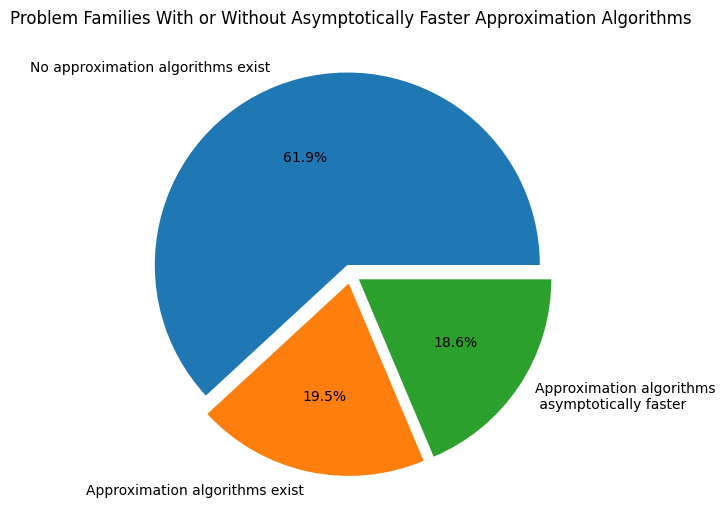

In [56]:
# Pie chart (Sheet 1 + Approximation Algorithms)
# category 1: All Family from sheet 1 with no approximation algorithm
# category 2: All Family that have an approximation algorithm but isnt better than exact
# category 3: All Family that have an approximation algorithm and is better than exact

total_families = len(sheet1['Family Name'].unique())
best_in_exact_percentage = len(best_in_exact) / total_families
best_in_approximation_percentage = len(best_in_approximation) / total_families
no_approximation_percentage = len(families_with_no_approximation_algorithms) / total_families

print(len(best_in_exact))
print(len(best_in_approximation))
print(len(families_with_no_approximation_algorithms))

# plot percentage of families by type of PTAS
fig, ax = plt.subplots(figsize=(6, 6))

data = [best_in_exact_percentage, best_in_approximation_percentage, no_approximation_percentage]

data = pd.Series(data, index=['Approximation algorithms exist', 'Approximation algorithms\n asymptotically faster', 'No approximation algorithms exist'])
data.to_csv('datasets/percentage-of-problem-families.csv')
print(data)


data = data.sort_values(ascending=False)

# pie chart with first 2 slices exploded together
explode = (0.1, 0, 0)

wedges, texts, percs = ax.pie(
    data,
    autopct='%1.1f%%',
    labels=[l for l in data.index],
    startangle=0
)

# margin top
ax.margins(0.1)

groups = [[0], [1], [2]]

radfraction = 0.05
for group in groups:
    ang = np.deg2rad((wedges[group[-1]].theta2 + wedges[group[0]].theta1) / 2)
    for j in group:
        center = radfraction * wedges[j].r * np.array([np.cos(ang), np.sin(ang)])
        wedges[j].set_center(center)
        texts[j].set_position(np.array(texts[j].get_position()) + center)
        percs[j].set_position(np.array(percs[j].get_position()) + center)
ax.autoscale(True)

 
plt.text(0, 1.3, 'Problem Families With or Without Asymptotically Faster Approximation Algorithms', color='black', fontsize=12, ha='center')

plt.savefig('figures/percentage-of-problem-families.png', bbox_inches='tight')

plt.show()


# Include families form approximation algorithms that are not in the in exact algorithms
# No approximation
# Has approximation, doesn't do better
# Has approximation, does better

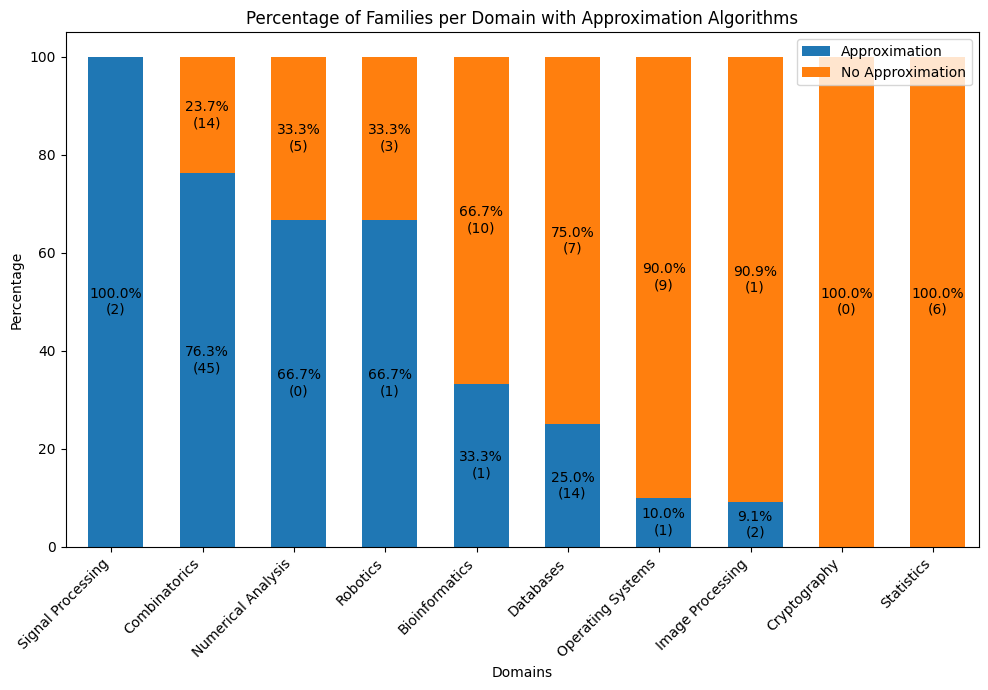

In [57]:
import math

# Count the total number of families per domain in the exact dataset
total_families_per_domain = sheet1.groupby('Domains')['Family Name'].nunique().reset_index()
total_families_per_domain.columns = ['Domains', 'Total Families']

# Count the number of families with approximation algorithms per domain
approx_families_per_domain = approximation_algorithms.groupby('Domains')['Family Name'].nunique().reset_index()
approx_families_per_domain.columns = ['Domains', 'Approximation Families']

# Merge the two datasets on 'Domains'
merged_df = pd.merge(total_families_per_domain, approx_families_per_domain, on='Domains', how='left')

# Fill NaN values with 0 (for domains that have no approximation families)
merged_df['Approximation Families'].fillna(0, inplace=True)

# Calculate percentages
merged_df['Approximation'] = (merged_df['Approximation Families'] / merged_df['Total Families']) * 100
merged_df['No Approximation'] = 100 - merged_df['Approximation']

# sort by Approximation
merged_df.sort_values(by=['Approximation'], inplace=True, ascending=False)


# Plot the data
fig, ax = plt.subplots(figsize=(10, 7))

# Plotting the approximation and no approximations side by side
bars = merged_df.plot(x='Domains', y=['Approximation', 'No Approximation'], kind='bar', stacked=True, ax=ax, color=['#1f77b4', '#ff7f0e'])

# Labeling
ax.set_title('Percentage of Families per Domain with Approximation Algorithms')
ax.set_ylabel('Percentage')
ax.set_xlabel('Domains')
plt.xticks(rotation=45, ha='right')

# Add labels with percentages and total families
for i, bar in enumerate(ax.patches):
    bar.set_width(0.6)
    height = bar.get_height()
    width = bar.get_width()
    x = bar.get_x()
    y = bar.get_y()
    
    if height == 0:
        continue
    if i > 9:
        label_text = f"{height:.1f}%\n({int(merged_df['Total Families'][i % 10]- merged_df['Approximation Families'][i % 10])})"
        ax.text(x + width / 2, y + height / 2, label_text, ha='center', va='center', fontsize=10, color='black')
    else:
        label_text = f"{height:.1f}%\n({int(merged_df['Approximation Families'][i % 10])})"
        ax.text(x + width / 2, y + height / 2, label_text, ha='center', va='center', fontsize=10, color='black')


plt.tight_layout()

# Show the plot
plt.show()

# Sort bars from higher values of approximation to lower values
# Some bars doesnt sum to 100

In [58]:
columns = ['Family Name', 'Time Complexity Class']

exact = sheet1[['Family Name', 'Time Complexity Class']]
approximation = approximation_algorithms[['Family Name', 'Time Complexity Class']]


# group by family, lowest time complexity class
exact = exact.groupby('Family Name').min()
approximation = approximation.groupby('Family Name').min()

# Merging exact and approximation dataframes on 'Family Name'
merged_df = exact.merge(approximation, on='Family Name', suffixes=('_exact', '_approximation'))

best_in_exact = merged_df[merged_df['Time Complexity Class_exact'] <= merged_df['Time Complexity Class_approximation']]
best_in_approximation = merged_df[merged_df['Time Complexity Class_exact'] > merged_df['Time Complexity Class_approximation']]




merged_df['Time Complexity Class_exact'] = np.floor(merged_df['Time Complexity Class_exact']).astype(int)
merged_df['Time Complexity Class_approximation'] = np.floor(merged_df['Time Complexity Class_approximation']).astype(int)
merged_df

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

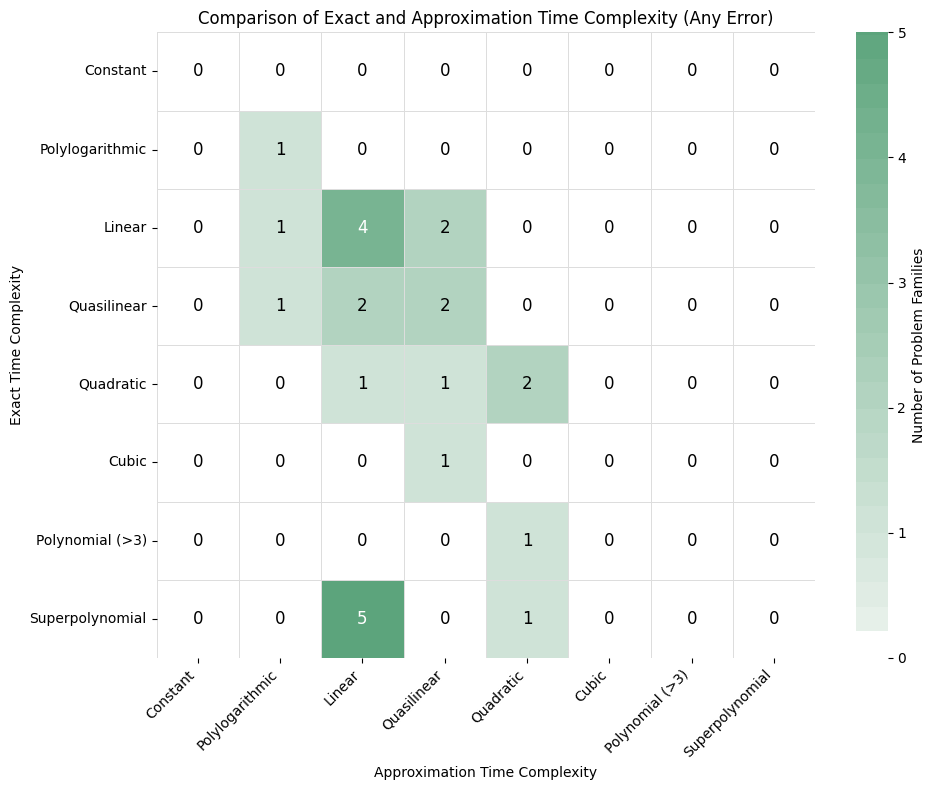

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Assuming you have merged_df from your previous steps

# Define the labels for the time complexity classes
labels = ['Constant', 'Polylogarithmic', 'Linear', 'Quasilinear', 'Quadratic', 'Cubic', 'Polynomial (>3)', 'Superpolynomial']

# Create a cross-tab to compare exact vs approximation
heatmap_data = pd.crosstab(merged_df['Time Complexity Class_exact'], 
                           merged_df['Time Complexity Class_approximation'])

# Ensure that all labels are represented
heatmap_data = heatmap_data.reindex(index=range(1, len(labels) + 1), columns=range(1, len(labels) + 1), fill_value=0)

# Create a custom color palette that starts with white for 0s
colors = sns.light_palette("seagreen", as_cmap=True)
cmap = ListedColormap(["#ffffff"] + colors(np.linspace(0, 3, 100))[1:].tolist())

# Plot the heatmap
plt.figure(figsize=(10, 8))
ax = sns.heatmap(heatmap_data, cmap=cmap, cbar_kws={'label': 'Number of Problem Families'}, linewidths=.5, center=10, linecolor='#ddd')

# Correct data labels placement and color
for i in range(heatmap_data.shape[0]):
    for j in range(heatmap_data.shape[1]): 
        txt = ax.text(j + 0.5, i + 0.5, heatmap_data.iloc[i, j], 
                ha="center", va="center", color="black", fontsize=12)
        if heatmap_data.iloc[i, j] > 3:
            txt.set_color("white")

# Set labels for axes
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_yticklabels(labels, rotation=0)
ax.set_xlabel('Approximation Time Complexity')
ax.set_ylabel('Exact Time Complexity')
ax.set_title('Comparison of Exact and Approximation Time Complexity (Any Error)')

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
columns = ['Family Name', 'Time Complexity Class']

exact = sheet1[['Family Name', 'Time Complexity Class']]
approximation_algorithms_constant_factor = approximation_algorithms[
    (approximation_algorithms['Approximation Factor Class (Mult)'].fillna(float('inf')) <= 4.5) |
    (approximation_algorithms['Approximation Factor Class (Add)'].fillna(float('inf')) <= 2)
]

approximation = approximation_algorithms_constant_factor[['Family Name', 'Time Complexity Class']]



# group by family, lowest time complexity class
exact = exact.groupby('Family Name').min()
approximation = approximation.groupby('Family Name').min()

# Merging exact and approximation dataframes on 'Family Name'
merged_df = exact.merge(approximation, on='Family Name', suffixes=('_exact', '_approximation'))

best_in_exact = merged_df[merged_df['Time Complexity Class_exact'] <= merged_df['Time Complexity Class_approximation']]
best_in_approximation = merged_df[merged_df['Time Complexity Class_exact'] > merged_df['Time Complexity Class_approximation']]


merged_df['Time Complexity Class_exact'] = np.floor(merged_df['Time Complexity Class_exact']).astype(int)
merged_df['Time Complexity Class_approximation'] = np.floor(merged_df['Time Complexity Class_approximation']).astype(int)

merged_df

,Time Complexity Class_exact,Time Complexity Class_approximation
Family Name,,
All-Pairs Shortest Paths (APSP),5,5
Cardinality Estimation,3,3
Closest Pair Problem,3,4
Determinant of Matrices with Integer Entries,5,3
Discrete Fourier Transform,4,4
Eigenvalues (Iterative Methods),2,2
Linear System,3,3
Link Analysis,6,4
Matrix Chain Multiplication,4,3


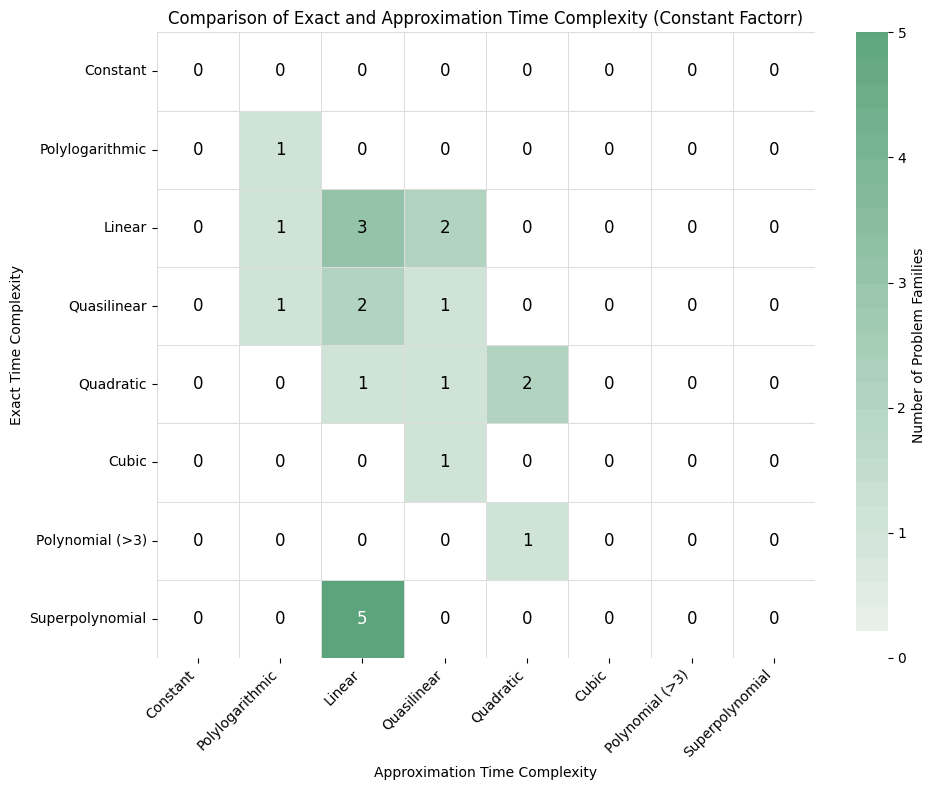

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Assuming you have merged_df from your previous steps

# Define the labels for the time complexity classes
labels = ['Constant', 'Polylogarithmic', 'Linear', 'Quasilinear', 'Quadratic', 'Cubic', 'Polynomial (>3)', 'Superpolynomial']

# Create a cross-tab to compare exact vs approximation
heatmap_data = pd.crosstab(merged_df['Time Complexity Class_exact'], 
                           merged_df['Time Complexity Class_approximation'])

# Ensure that all labels are represented
heatmap_data = heatmap_data.reindex(index=range(1, len(labels) + 1), columns=range(1, len(labels) + 1), fill_value=0)

# Create a custom color palette that starts with white for 0s
colors = sns.light_palette("seagreen", as_cmap=True)
cmap = ListedColormap(["#ffffff"] + colors(np.linspace(0, 3, 100))[1:].tolist())

# Plot the heatmap
plt.figure(figsize=(10, 8))
ax = sns.heatmap(heatmap_data, cmap=cmap, cbar_kws={'label': 'Number of Problem Families'}, linewidths=.5, center=10, linecolor='#ddd')

# Correct data labels placement and color
for i in range(heatmap_data.shape[0]):
    for j in range(heatmap_data.shape[1]): 
        txt = ax.text(j + 0.5, i + 0.5, heatmap_data.iloc[i, j], 
                ha="center", va="center", color="black", fontsize=12)
        if heatmap_data.iloc[i, j] > 3:
            txt.set_color("white")

# Set labels for axes
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_yticklabels(labels, rotation=0)
ax.set_xlabel('Approximation Time Complexity')
ax.set_ylabel('Exact Time Complexity')
ax.set_title('Comparison of Exact and Approximation Time Complexity (Constant Factorr)')

# Show the plot
plt.tight_layout()
plt.show()
# New Graph

